# Credit Card Fraud Investigation

## Context & Data

We are investigating credit card fraud and whether it is possible to detect this fraud from given data. <br>

We have credit card transaction records as structured data consisting of a mix of quantitative and categorical variables including transaction amount, merchant, time and location. Important categorical variables also include transaction type (online or in-store) and customer profile (regular, irregular). This structured data comes in the form of spreadsheets and can be analysed using Python Pandas as a dataframe. This data could be imported as a CSV.

There is also unstructured data available from customer complaints and enquiries relating to credit card fraud. This may not seem relevant for our initial statistical analysis but will provide excellent context for our situation. We could use ChatGPT to investigate large amounts of customer complaints and pick out key words to potentially indicate what we should look for in our analysis.
Some of the available datasets have anonymised the variable name due to confidentiality of the data. We must trust that these variables are relevant in contributing to the analysis of credit card fraud.


## Packages, Resources & GitHub
There are many resources available including Kaggle for datasets, Python libraries including Pandas and NumPy for data analysis and scikit-learn for machine learning models in our later investigation. Also, there is a large amount of documentation explaining fraud detection algorithms which can be leveraged in our scenario. Furthermore, there are many GitHub repositories investigating this scenario. We could use some of the analyses in these and either expand on them or use these to help us to design and implement our models.

We aim to create a successful fraud detection algorithm and we must use our resources effectively and efficiently to do so. The Python packages will be essential for our initial data analysis and then when creating our algorithm. Machine learning algorithms including k-means clustering and logistic regression will likely be helpful for classifying transactions as fraudulent.

GitHub allows us to collaborate remotely as a group which is vital for the project due to the time constraints. Privacy issues are less significant since the data that we will be using is publicly available. Significant issues may occur if GitHub itself shuts down and we cannot access our repository to work together on the project.

We will perform exploratory data analysis on a particular dataset, using Pandas and NumPy to analyse the data, with Matplotlib and Seaborn to create interesting visualisations.

The dataset that we have chosen to analyse is called [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data), and was found on [Kaggle](https://www.kaggle.com).

## Exploratory Data Analysis

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset using pandas
df = pd.read_csv('creditcard.csv')

# quick data preview
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# shape of dataset
print(f"Rows: {df.shape[0]}.")
print(f"Columns: {df.shape[1]}.")

Rows: 284807.
Columns: 31.


In [5]:
# basic info to understand data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# look for any missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There are no null values in the dataset. Thus, we do not need to clean or pre-process null values out of the dataset and we can start looking directly at the data.

In [7]:
# summary statistics
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

We can see that 'Amount' is very variable due to the high standard deviation and also very skewed since the mean is higher than the third quartile. The 'Class' column is also very skewed with many more non-fraudulent cases.

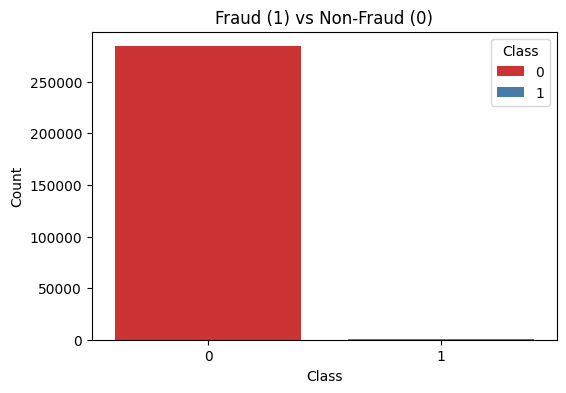

In [9]:
# plot fraud vs non-fraud counts
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set1', hue='Class')
plt.title('Fraud (1) vs Non-Fraud (0)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Clearly, the data is very skewed and there are many more cases of 'non-fraud' than 'fraud'.

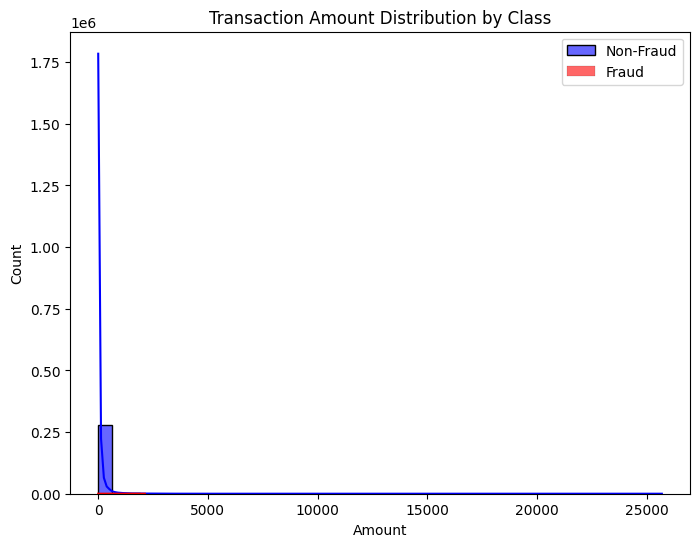

In [10]:
# distribution of transaction amounts by class
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=40, color='blue', kde=True, label='Non-Fraud', alpha=0.6)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=40, color='red', kde=True, label='Fraud', alpha=0.6)
plt.title('Transaction Amount Distribution by Class')
plt.legend()
plt.show()

Non-fraudulent cases typically have lower 'Amount' values and fraudulent cases typically have a wider range of 'Amount' values with some very high.

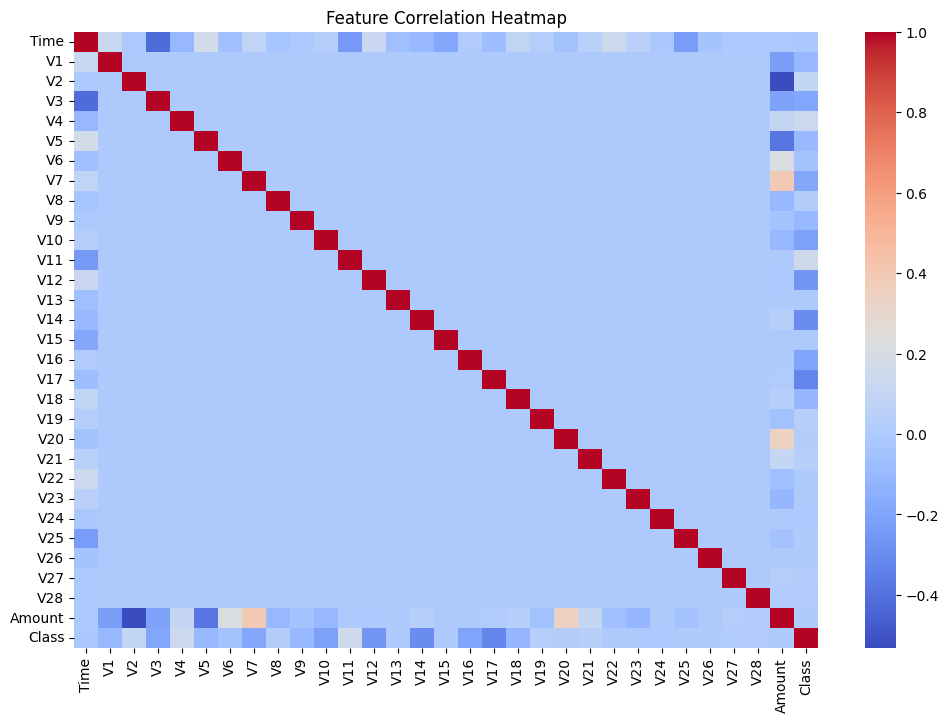

In [11]:
# heatmap of feature correlations
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

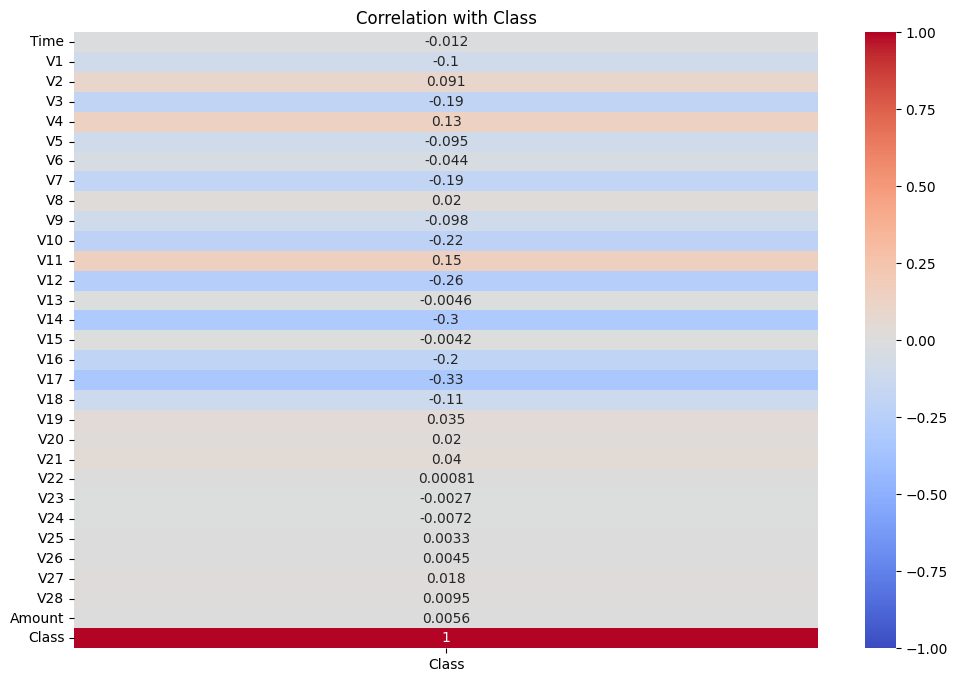

In [12]:
# heatmap of feature correlations, focusing on correlation with 'Class'
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix[['Class']], annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation with Class')
plt.show()

Correlations are generally very low, suggesting there may be a non-linear relationship with 'Class'.

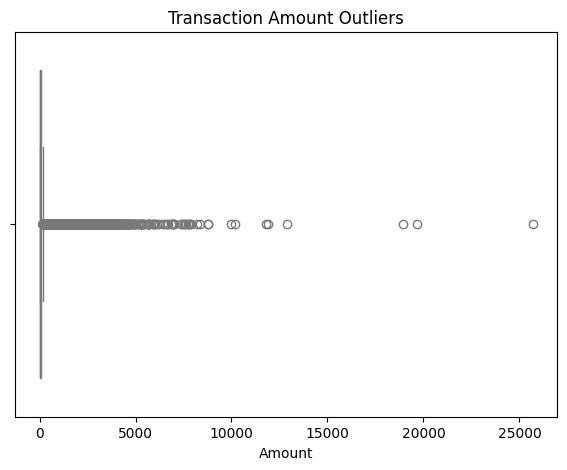

In [13]:
# outlier detection for transaction amounts
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Amount'], color='lightblue')
plt.title('Transaction Amount Outliers')
plt.show()

C:\Users\Sheri\AppData\Local\Temp\ipykernel_20892\2096811958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette='Set1')


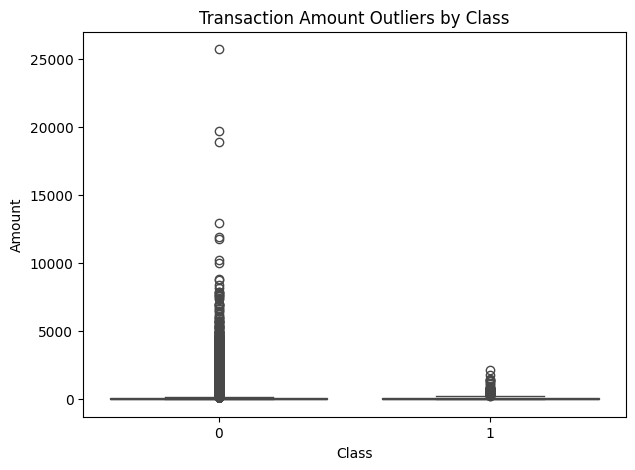

In [14]:
# outlier detection for transaction amounts by class
plt.figure(figsize=(7, 5))
sns.boxplot(x='Class', y='Amount', data=df, palette='Set1')
plt.title('Transaction Amount Outliers by Class')
plt.show()

Most transaction amounts are very small but there are a number of very high transactions, surprisingly more outliers from the non-fraudulent class.

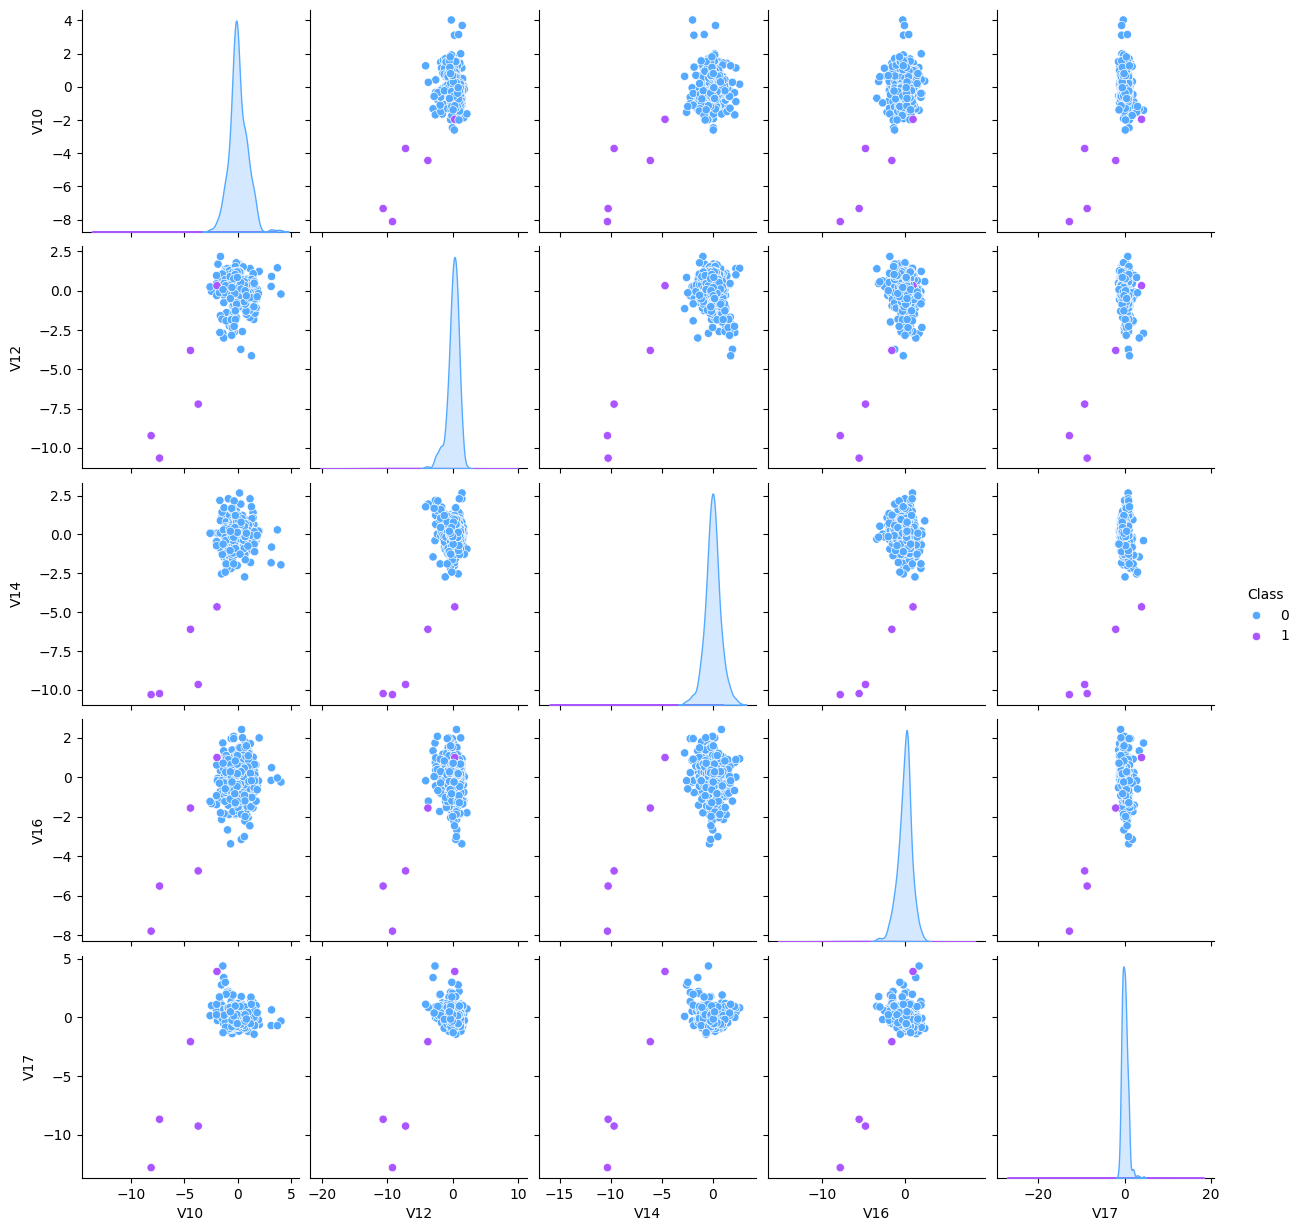

In [15]:
# pairplot for top 5 most correlated predictors
top_predictors = corr_matrix['Class'].abs().sort_values(ascending=False).index[1:6]  # top 5 predictors

sample = df.sample(500)  # sample 500 rows to speed up visualization
sns.pairplot(sample[top_predictors.union(['Class'])], hue='Class', palette='cool')
plt.show()

The pair plots show that there may be non-linear relationship between the predictors since there are clusters of points. We may need to consider clustering methods to further analyse these relationships.

In [16]:
# skewness of transaction amounts
print("Skewness in 'Amount':", df['Amount'].skew())

# skewness of transaction amounts by class
skew_non_fraud = df[df['Class'] == 0]['Amount'].skew()
skew_fraud = df[df['Class'] == 1]['Amount'].skew()
print(f"Skewness in 'Amount' for non-fraud: {skew_non_fraud}")
print(f"Skewness in 'Amount' for fraud: {skew_fraud}")

Skewness in 'Amount': 16.977724453761024
Skewness in 'Amount' for non-fraud: 17.00314710107444
Skewness in 'Amount' for fraud: 3.7544765273817413


In [17]:
# count fraud vs non-fraud transactions
fraud_cases = df[df['Class'] == 1].shape[0]
non_fraud_cases = df[df['Class'] == 0].shape[0]

print(f"Number of fraud cases: {fraud_cases}")
print(f"Number of non-fraud cases: {non_fraud_cases}")

Number of fraud cases: 492
Number of non-fraud cases: 284315


Again, we can see that the data is very skewed and there are many more cases of 'non-fraud' than 'fraud'. The non-fraudulent transaction values ('Amount') have much more skewness than the fraudlent. We may need to transform the data to analyse it more successfully.

## Conclusion
We can see that the data is highly skewed towards non-fraudulent cases and we must implement methods to overcome this if we want to train a model to identify fraud. We must use the vast range of named resources to learn more about such methods and models. One way of dealing with imbalanced data is explored in the next document.

This is an initial analysis of the data which we will expand on in the next project.